# Lecture 2 - Data Presentation

Heavily inspired by a my colleague Anders S. Christensen. Check out his github intros for yourself!

https://github.com/andersx/python-intro

Matplotlib examples are from the Matplotlib website.

## Section 0 - A note on numpy

Most external packages and actual data handling is not done using pure python but rather the much faster package "Numpy". Numpy uses its own version of list which work a bit differently to the normal python lists. The most important property is that the arithmetic operators work on elements/element wise instead of the entire list. To see how the other functions work check this cheat sheet: https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

In [ ]:
import numpy as np
python_list_a = [1,3,4]
python_list_b = [8,8,8]
numpy_array_a = np.array([1,3,4])
numpy_array_b = np.array([8,8,8])
print('Adding:')
print(python_list_a+python_list_b)
print(numpy_array_a+numpy_array_b)
print('Doing math:')
print(python_list_a*3)
print(numpy_array_a*3)

Adding:
[1, 3, 4, 8, 8, 8]
[ 9 11 12]
Doing math:
[1, 3, 4, 1, 3, 4, 1, 3, 4]
[ 3  9 12]


## Section 1 - Linear Least Squares Regression

First, lets start with some data for a linear function:
\begin{equation}
y = 1.2x + \mathrm{noise}
\end{equation}

In [ ]:
import numpy as np

np.random.seed(666)

# X-values
x = np.arange(0,20.0, 0.2) #arange is numpys version of range which allows for floats.

# Y-values: Y = 1.2*X + random noise
y = 1.2 * x + np.random.normal(scale=2.0, size=len(x))

print(x.shape) #Prints the size of the array
print(y.shape)

(100,)
(100,)


#### Let's try to plot the data using matplotlib package:
* Pretty much all the plot types avaiable in the matplotlib package uses the same syntax as the scatter plot.
* Feel free to change to parameters to learn what they do.


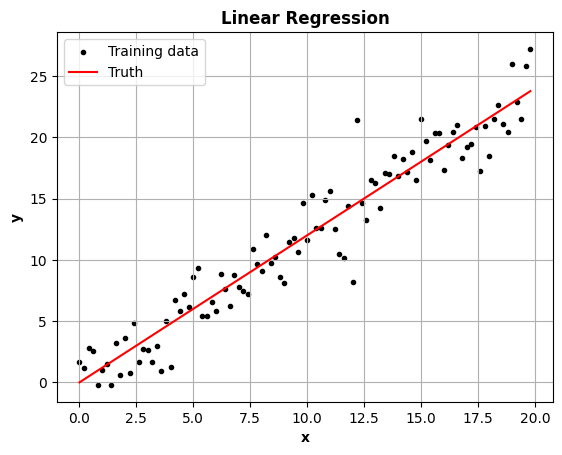

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y, marker='.', color='black', label='Training data')
plt.plot(x, x*1.2, color='red', label="Truth")
plt.xlabel('x', size=10, weight='bold')
plt.ylabel('y', size=10, weight='bold')
plt.grid(True)
plt.title('Linear Regression', size=12, weight='bold')
plt.legend()
plt.show()

#### We now want to fit a linear regression model to the data using the scipy package:

In [ ]:
import scipy.optimize as sco

Let's define the function we want to fit (Note it is important that the FIRST variable is the independant variable x)

In [ ]:
def func(x, m, b):
    y = m * x + b
    return y

Let's try to fit it, make sure to have matching variables in the func and for the output.

In [ ]:
(m, b), var = sco.curve_fit(func, x, y)

In [ ]:
residuals = y - func(x, m, b)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
R2 = 1 - (ss_res / ss_tot)

Finally the plot:

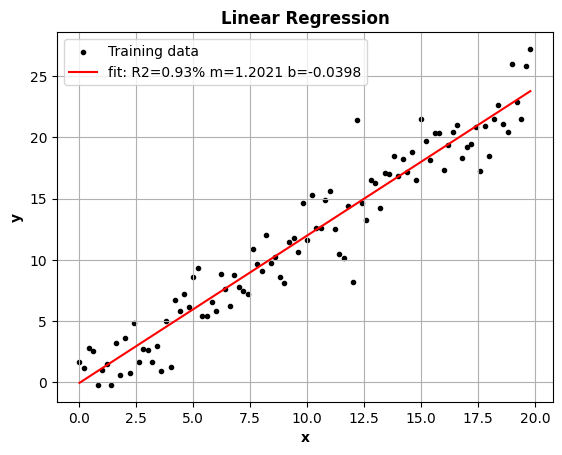

In [ ]:
plt.scatter(x, y, marker='.', color='black', label='Training data')
plt.plot(x, func(x, m, b), color='red', label=f'fit: R2={R2:.2f}% m={m:.4f} b={b:.4f}')
plt.xlabel('x', size=10, weight='bold')
plt.ylabel('y', size=10, weight='bold')
plt.grid(True)
plt.title('Linear Regression', size=12, weight='bold')
plt.legend()
plt.show()

### What does linear regression do?

It is an approximation to a linear function:

\begin{equation}
y(\mathbf{x}) = x_1 \alpha_1 + x_2 \alpha_2 + \dots + x_n \alpha_n
\end{equation}
This can conviently be written in vector notation:
\begin{equation}
y(\mathbf{x}) = \mathbf{x} \cdot \mathbf{\alpha}
\end{equation}

Where $\mathbf{x}$ is our feature vector/descriptor/representation for a given datapoint. $\mathbf{\alpha}$ is the vector of regression coefficients.

"Fitting" is what you do to find the best set of $\alpha$-values. This is done by finding the solution with the "least squares":

\begin{equation}
\mathbf{y} = \mathbf{X}\mathbf{\alpha}
\end{equation}

Minimze the error:
\begin{equation}
\mathbf{\alpha} = \text{arg min} || \mathbf{y}^\text{ref} - \mathbf{X}\mathbf{\alpha}||^2
\end{equation}

## Section 2 - Non-linear regression?
If we have some theory for the function parameters, sco.curve_fit can also be used to do non-linear least squares. All we have to do is make sure that the function takes the independant variable as the first input parameter and we have matching number of parameters for th output of the fit function.
We have a and b in our function, thus sco.curve_fit requires (a,b) to the store the variables. This example shows the power of python, we can easily plot and fit any function we want!

3.0203000521837478 0.7081685319847509


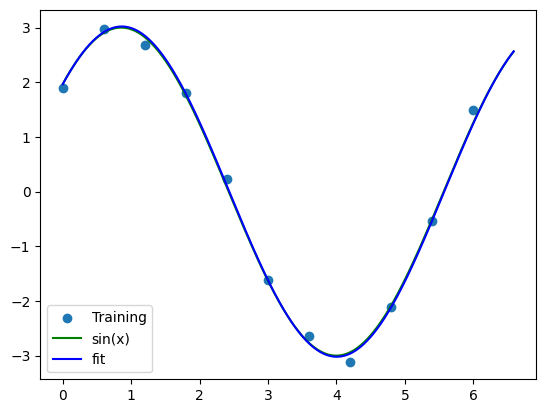

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0,6.6, 0.6)
y = 3*np.sin(x+7) + (np.random.random(size=len(x)) - 0.5) * 0.5

def func(x,a,b):
  return a*np.sin(x+b)

xplot = np.arange(0,6.6, 0.01)

(a,b), var = sco.curve_fit(func, x, y)
print(a,b)

plt.scatter(x, y, label="Training")
plt.plot(xplot, 3*np.sin(xplot+7), color="g", label="sin(x)")
plt.plot(xplot, func(xplot,a,b), color="b", label="fit")

plt.legend()
plt.show()

#### However, what if we do not know what the function looks like ? This is a job for machine learning! There is a very cool example (machine_learning_example_sinx.ipynb) at https://github.com/andersx/python-intro

## Section 3 - Plotting types

Can everything be nicely plotted as a linear function?

What about multivariable data sets?

What should I choose?

## Histograms

Example taken from matpotlib documentation.

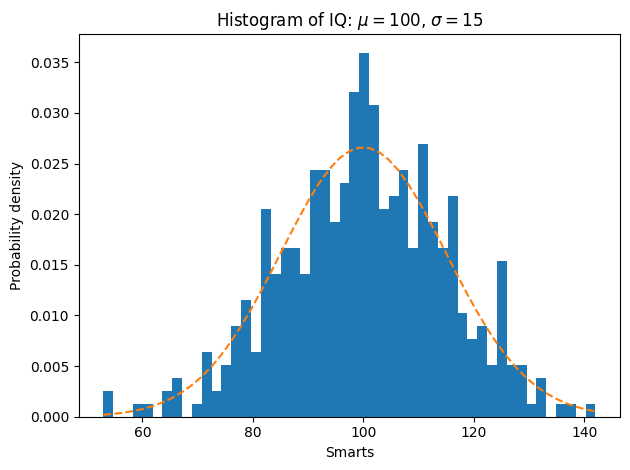

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
plt.plot(bins, y, '--')
plt.xlabel('Smarts')
plt.ylabel('Probability density')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.show()

## Box plots, violin plots and multiplots
Example based on matpotlib documentation. When combining multiple plots into one graph, people usually use plt.subplot. However, matplotlib have introduced a much more powerfull multigraphing function called subplot_mosaic: https://matplotlib.org/stable/gallery/text_labels_and_annotations/label_subplots.html#sphx-glr-gallery-text-labels-and-annotations-label-subplots-py

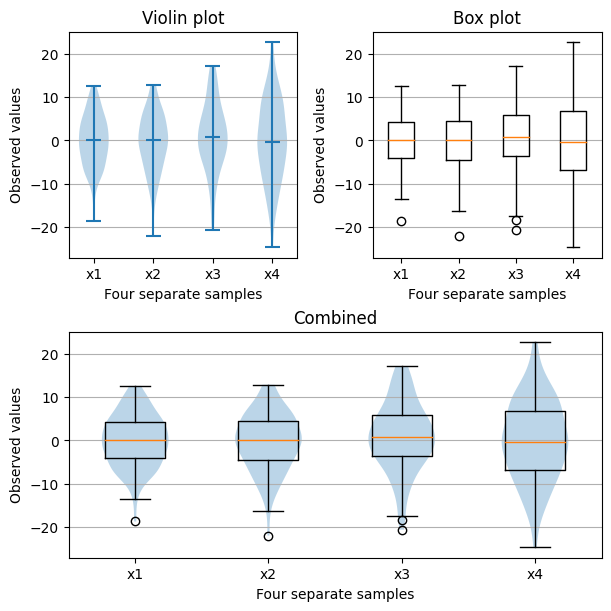

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplot_mosaic([['left','right'],
                                ['left','right'],
                                ['bottom','bottom'],
                                ['bottom','bottom']],
                                layout='constrained',
                                figsize=(6,6))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes['left'].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes['left'].set_title('Violin plot')

# plot box plot
axes['right'].boxplot(all_data)
axes['right'].set_title('Box plot')

# plot both
axes['bottom'].violinplot(all_data,
                   showmeans=False,
                   showmedians=False,
                   showextrema=False)
axes['bottom'].boxplot(all_data)
axes['bottom'].set_title('Combined')

# adding horizontal grid lines
for ax in axes:
    axes[ax].yaxis.grid(True)
    axes[ax].set_xticks([y + 1 for y in range(len(all_data))])
    axes[ax].set_xticklabels(['x1', 'x2', 'x3', 'x4'])
    axes[ax].set_xlabel('Four separate samples')
    axes[ax].set_ylabel('Observed values')

plt.show()

## Bar plots

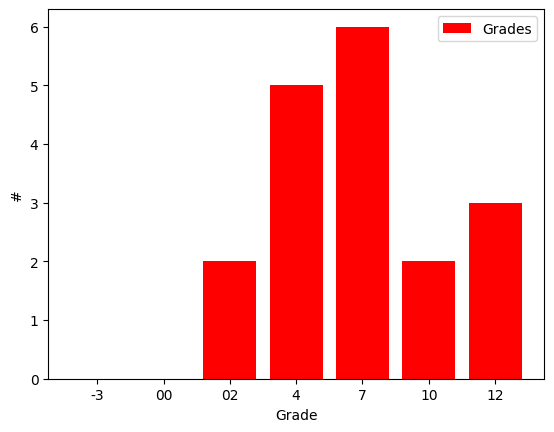

In [ ]:
grade_counts = [0,0,2,5,6,2,3]
grade_names = ['-3','00','02','4','7','10','12']
plt.bar(grade_names,grade_counts, color='red', label = 'Grades')
plt.xlabel('Grade')
plt.ylabel('#')
plt.legend()

##Advanced plots
Let's say we want to make a bar plot with four categories and some custome labels, colors and ticks? Let's try some more advanced techniques to automate it!

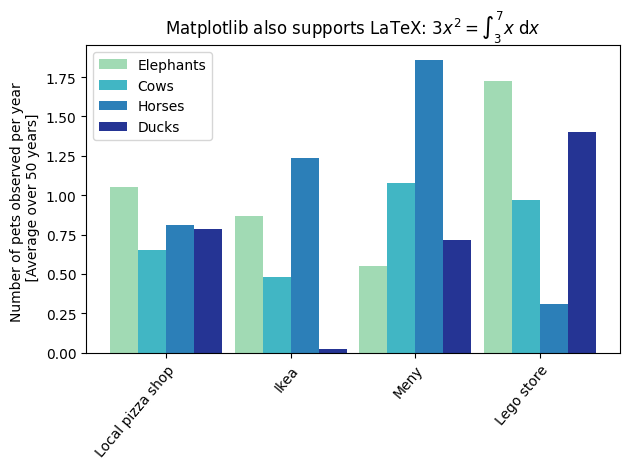

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# generate some random test data
mediums = ['Elephants', 'Cows', 'Horses', 'Ducks']
categories = ['Local pizza shop', 'Ikea', 'Meny', 'Lego store']
colors = ['#a1dab4', '#41b6c4', '#2c7fb8', '#253494']
data = [abs(np.random.normal(0, 1, len(categories))) for _ in range(len(mediums))]
bar_width = 1 * 0.9 / len(mediums)  # We want some space between the groups
index_category = np.arange(len(categories))
index_medium = np.arange(len(mediums))
# Zip packs the values elementwise into a list of tuples, we can then unpack them again in pairs
for (idx, current_data, current_medium, current_color) in zip(index_medium, data, mediums, colors):
    plt.bar(index_category + bar_width * idx, current_data, width=bar_width, label=current_medium, color=current_color)

plt.xticks(index_category + bar_width * (len(mediums) / 2 - 1 / 2), categories, rotation=50, ha='right', rotation_mode="anchor")
plt.ylabel('Number of pets observed per year \n [Average over 50 years]')
plt.legend()
plt.title(r'Matplotlib also supports LaTeX: $3x^2=\int_{3}^{7}x~\mathrm{d}x$')
plt.tight_layout()
plt.show()


## Section 4 - Working with data
When doing chemistry we often collect lots of data. Usually in the form of spreadsheets. Python has a nice package called Pandas for handling these sorts of data collections. Let's try to load a spreadsheet file. Pandas can load excel sheets using the pandas.read_excel function but we will be using a comma sperated csv file today.

In [ ]:
import pandas as pd
df = pd.read_csv('MD.csv')

When we load our data we create a Pandas dataframe. You can index the columns like a dictonary and the extracted data series have most of the same functionality as Numpy arrays. Let's try to show the dataframe!

In [ ]:
df

,B97,OLD,NEW,time
0,-7566.855809,-283.704906,-274.982793,0.0
1,-7566.777303,-283.668258,-274.927471,12.5
2,-7566.740468,-283.674129,-274.886390,25.0
3,-7566.736825,-283.652243,-274.882877,37.5
4,-7566.696535,-283.637304,-274.862104,50.0
5,-7566.693005,-283.633148,-274.838354,62.5
6,-7566.689544,-283.664443,-274.839836,75.0
7,-7566.717688,-283.686519,-274.842983,87.5
8,-7566.692384,-283.646759,-274.841033,100.0
9,-7566.675484,-283.631594,-274.841397,112.5


Get some statistics

In [ ]:
df.describe()

,B97,OLD,NEW,time
count,41.000000,41.000000,41.000000,41.000000
mean,-7566.689599,-283.645433,-274.863778,250.000000
std,0.034974,0.019743,0.025954,149.739357
min,-7566.855809,-283.704906,-274.982793,0.000000
25%,-7566.691468,-283.656680,-274.873472,125.000000
50%,-7566.679276,-283.639948,-274.862104,250.000000
75%,-7566.673714,-283.632964,-274.846607,375.000000
max,-7566.655447,-283.615791,-274.838354,500.000000


Extract the row at time=12.5

In [ ]:
df.loc[df['time']==12.5]

,B97,OLD,NEW,time
1,-7566.777303,-283.668258,-274.927471,12.5


Or maybe just the B97 energy at time 12.5

In [ ]:
df.loc[df['time']==12.5, 'B97']

0   -7566.855809
Name: B97, dtype: float64

Pandas has inbuilt plotting functions but we prefer doing data handling with Pandas and the plotting with matplotlib.

Text(0.5, 1.0, 'PCC=0.78')

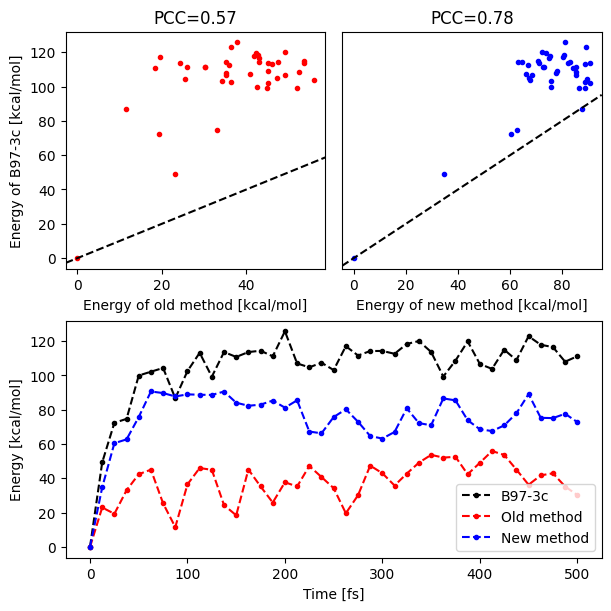

In [ ]:
import matplotlib.pyplot as plt
B97_energy = (df['B97']-df.loc[df['time']==0, 'B97'].values)*627.503
OLD_energy = (df['OLD']-df['OLD'][0])*627.503 #Alternativ way since we know the first position is at time = 0
NEW_energy = (df['NEW']-df['NEW'][0])*627.503
time = df['time']



fig, axes = plt.subplot_mosaic([['left','right'],
                                ['left','right'],
                                ['bottom','bottom'],
                                ['bottom','bottom']],
                                layout='constrained',
                                figsize=(6,6))

axes['bottom'].plot(time,B97_energy,'.--',label='B97-3c',color='black')
axes['bottom'].plot(time,OLD_energy,'.--',label='Old method',color='red')
axes['bottom'].plot(time,NEW_energy,'.--',label='New method',color='blue')
axes['bottom'].legend()
axes['bottom'].set_xlabel('Time [fs]')
axes['bottom'].set_ylabel('Energy [kcal/mol]')

#Old correlation plot
old_correlation=B97_energy.corr(OLD_energy)
axes['left'].plot(OLD_energy,B97_energy,'.',color='red')
axes['left'].axline((0,0),slope=1,color='black',linestyle="--")
axes['left'].set_ylabel('Energy of B97-3c [kcal/mol]')
axes['left'].set_xlabel('Energy of old method [kcal/mol]')
axes['left'].set_title(f'PCC={old_correlation:.2f}')

#New correlation plot
new_correlation=B97_energy.corr(NEW_energy)
axes['right'].plot(NEW_energy,B97_energy,'.',color='blue')
axes['right'].axline((0,0),slope=1,color='black',linestyle="--")
axes['right'].set_xlabel('Energy of new method [kcal/mol]')
axes['right'].set_yticks([])
axes['right'].set_title(f'PCC={new_correlation:.2f}')

